## Seminar 13. ML for Large Rubik's Cubes.



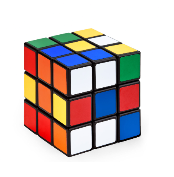

Let's examine the Rubik's Cube solving method presented in A. Chernov et al.'s "A Machine Learning Approach That Beats Large Rubik's Cubes" (https://www.arxiv.org/abs/2502.13266). A similar idea is employed in their "CayleyPy RL: Pathfinding and Reinforcement Learning on Cayley Graphs" (https://arxiv.org/abs/2502.18663)

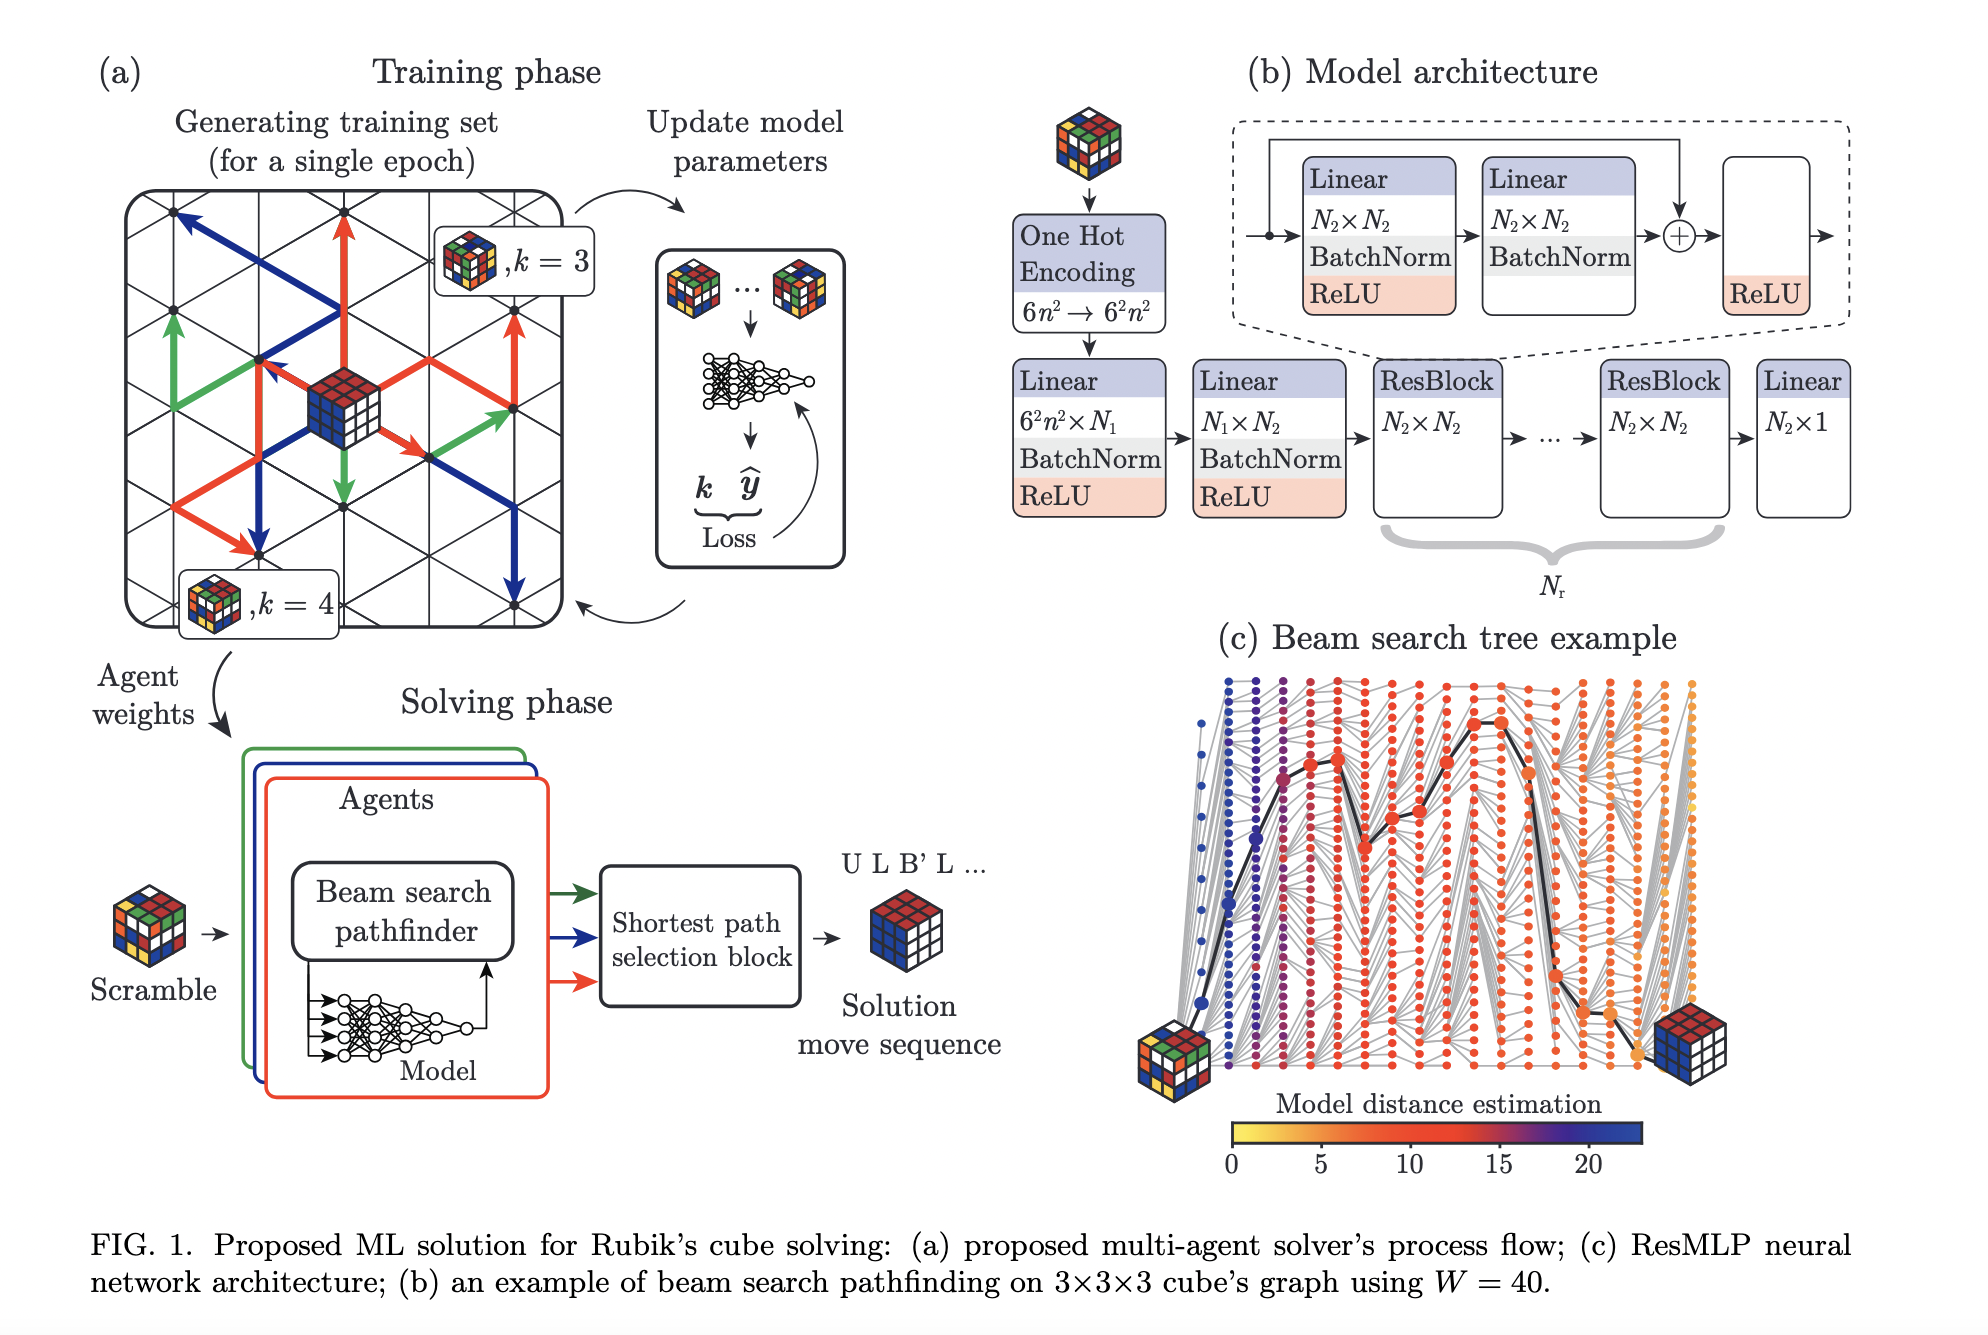

Repository: https://github.com/k1242/cayleypy-cube

In [ ]:
!git clone https://github.com/k1242/pilgrim.git
!cd pilgrim

In [ ]:
from IPython.display import clear_output

In [ ]:
# !pip install schedulefree
!cd pilgrim && pip install -r requirements.txt
clear_output()

# Training

Parameters:

* `cube_size`: Cube size (e.g., 3 for 3x3x3 or 4 for 4x4x4).  
* `cube_type`: Cube move set (qtm for quarter-turn metric or all for all moves).  
* `K_min` and `K_max`: Minimum and maximum values for random walks (default 1 and 30).
* `hd1`: Size of the first hidden layer (e.g., 2000).
* `hd2`: Size of the second hidden layer (0 means no second layer).
* `nrd`: Number of residual blocks (0 means no residual blocks).
* `epochs`: Number of training epochs.   
* `batch_size`: Batch size (default `10000`).
* `lr`: Learning rate for the optimizer (default `0.001`).
* `optimizer`: Optimizer, `Adam` or `AdamSF` means schedulefree module use (default `Adam`).
* `activation`: Activation function, `relu` or `mish` (default `relu`).
* `use_batch_norm`: Batch normalization usage, `True` or `False` (default `True`).
* `device_id`: Device ID to use different graphics card (default `0`).

In [ ]:
!cd pilgrim && python train.py --cube_size 3 --cube_type all --epochs 2

## Output

When you run the training script, the following output and files are generated:

1. **Training Logs (CSV)**:
        
A CSV file is created in the logs/ directory that tracks the training progress. This file logs the following information for each epoch:
            
* `epoch`: The current epoch number.
* `train_loss`: The loss value at the end of each epoch.
* `vertices_seen`: The number of vertices (data points) seen in each epoch.
* `data_gen_time`: Time taken to generate the training data for the current epoch.
* `train_epoch_time`: Time taken to complete the training step for the current epoch.
        
The file is saved with the naming convention: `train_{model_name}_{model_id}.csv`.

2. **Model Weights (Checkpoint Files)**:
       
The model weights are saved periodically during training:
            
* Power of Two Epochs: Weights are saved at epochs that are powers of two (e.g., epoch 1, 2, 4, 8, 16, ...). These weights are saved in the weights/ directory with the filename: `weights/{model_name}_{model_id}_e{epoch}.pth`.
            
* Epoch 10,000 and 50,000: If training reaches these epochs, weights are saved with the filename: `weights/{model_name}_{model_id}_e10000.pth and weights/{model_name}_{model_id}_e50000.pth`.
            
* Final Weights: After the final epoch, the weights are saved with the filename: `weights/{model_name}_{model_id}_e{final_epoch}_final.pth.`


# Testing

Parameters:

* `cube_size`: The size of the cube (e.g., 4 for 4x4x4 cube).
* `cube_type`: The cube type, either qtm (quarter-turn metric) or all (all moves).
* `weights`: Path to the saved model weights.
* `tests`: Path to the test dataset (optional). If not provided, it defaults to the dataset in `datasets/{cube_type}_cube{cube_size}.pt`.
* `B`: Beam size for the beam search (default `4096`).
* `tests_num`: Number of test cases to run (default `10`).
* `device_id`: Device ID to use different graphics card.
* `verbose`: Each step of beam search printed as tqdm, default is `0`.



Output:

* **Log File**: The test results, including solution lengths and attempts, are saved to a log file in the logs/ directory. The log file is named based on the model name, model ID, epoch, and beam size:

```
logs/test_{model_name}_{model_id}_{epoch}_B{beam_size}.json
```

The log file contains the following information for each test case:

* `test_num`: The index of the test case.
* `solution_length`: The number of moves in the solution (if found).
* `attempts`: The number of attempts made by the searcher to solve the test case.
* `moves`: The sequence of moves for solving the cube, stored as a list.

If no solution is found, the `solution_length`, `attempts`, and `move`s will be set to `None`.


In [ ]:
# Copy weights from the folder weights/
# Use model trained above or weights/cube4_all_MLP2_2000_1418_0_4.00M_1727996220_e2pow14.pth
# Replace the model id below to load the correct file (replace this part: 1744926919 with id from the previous cell)
!cd pilgrim && python test.py --cube_size 3 --cube_type all --weights weights/cube3_all_MLP2RB_07M_1744926919_e00002.pth --tests_num 10 --B 65536


# Remarks

* [$+$] The model employs a straightforward concept that proves successful for the Rubik's Cube.
* [$-$] However, scalability is a concern: it requires more agents and a larger search beam, potentially exceeding available resources for very large state spaces.